<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>



<h1><font color="#004D7F" size=4>  Datos Categoricos</font></h1>

<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

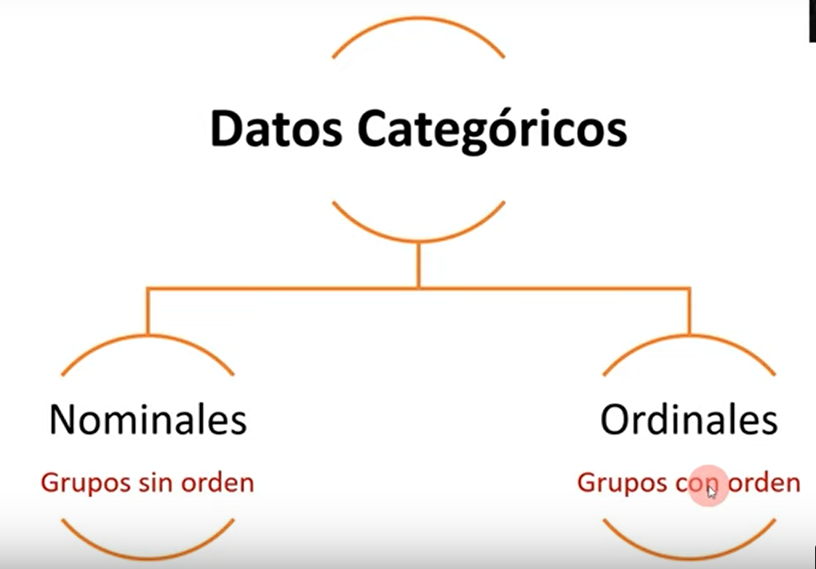

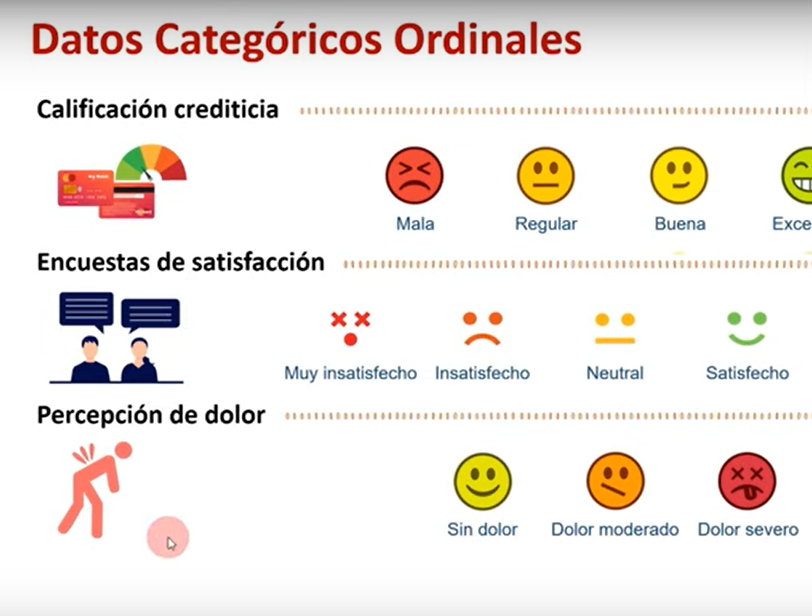

In [25]:
import pandas as pd
datos = {"nombre": ["Mariana", "Ana", "Else","Gustavo","Pedro","Raul","Carlos","José","Luis"], 
         "saldo":[10000.00, 8000.00,9000.00,2000.00,2100.00,12000.00,5000.00,10000.00,200.00],
         "pais":["Argentina","Bolivia","Chile","Colombia","Costa Rica","Ecuador","México","Perú","Perú"]
        }

In [26]:
datos = pd.DataFrame(datos)
datos["pais"] = datos["pais"].astype("category")
datos

,nombre,saldo,pais
0,Mariana,10000.0,Argentina
1,Ana,8000.0,Bolivia
2,Else,9000.0,Chile
3,Gustavo,2000.0,Colombia
4,Pedro,2100.0,Costa Rica
5,Raul,12000.0,Ecuador
6,Carlos,5000.0,México
7,José,10000.0,Perú
8,Luis,200.0,Perú


#  INAPROPIADA Codificación con Reemplazo

In [9]:
datos_sesgados = datos.copy()

reemplazados = {"Argentina" : 1,
                "Bolivia" : 2,
                "Chile" : 3,
                "Colombia" : 4,
                "Costa Rica" : 5,
                "Ecuador": 6,
                "México": 7,
                "peru":8
               }

datos_sesgados["pais"].replace(reemplazados, inplace=True)
datos_sesgados

,nombre,saldo,pais
0,Mariana,10000.0,1
1,Ana,8000.0,2
2,Else,9000.0,3
3,Gustavo,2000.0,4
4,Pedro,2100.0,5
5,Raul,12000.0,6
6,Carlos,5000.0,7
7,José,10000.0,Perú
8,Luis,200.0,Perú


# Codificación de Categorías One-hot

In [14]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()

codification = codificador.fit_transform(datos[["pais"]]) #trasformas las categorias a columnas

#Solo es para imprimer
print(type(codification))
print(codification)
print(codification.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 7)	1.0
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
#pasamos las nuevas columnas a un dataframe(excel)
# columns=codificador.categories_ van los nombres de los pais es decir las categorias
nuevas_cols = pd.DataFrame(codification.toarray(), columns=codificador.categories_ )
print(nuevas_cols)

  Argentina Bolivia Chile Colombia Costa Rica Ecuador México Perú
0       1.0     0.0   0.0      0.0        0.0     0.0    0.0  0.0
1       0.0     1.0   0.0      0.0        0.0     0.0    0.0  0.0
2       0.0     0.0   1.0      0.0        0.0     0.0    0.0  0.0
3       0.0     0.0   0.0      1.0        0.0     0.0    0.0  0.0
4       0.0     0.0   0.0      0.0        1.0     0.0    0.0  0.0
5       0.0     0.0   0.0      0.0        0.0     1.0    0.0  0.0
6       0.0     0.0   0.0      0.0        0.0     0.0    1.0  0.0
7       0.0     0.0   0.0      0.0        0.0     0.0    0.0  1.0
8       0.0     0.0   0.0      0.0        0.0     0.0    0.0  1.0


In [27]:
datos=pd.concat([datos,nuevas_cols], axis='columns')
datos

,nombre,saldo,pais,"(Argentina,)","(Bolivia,)","(Chile,)","(Colombia,)","(Costa Rica,)","(Ecuador,)","(México,)","(Perú,)"
0,Mariana,10000.0,Argentina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ana,8000.0,Bolivia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Else,9000.0,Chile,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Gustavo,2000.0,Colombia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Pedro,2100.0,Costa Rica,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Raul,12000.0,Ecuador,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Carlos,5000.0,México,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,José,10000.0,Perú,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Luis,200.0,Perú,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
#Se elimina la columna pais
datos.drop('pais', axis="columns", inplace=True)

In [29]:
datos

,nombre,saldo,"(Argentina,)","(Bolivia,)","(Chile,)","(Colombia,)","(Costa Rica,)","(Ecuador,)","(México,)","(Perú,)"
0,Mariana,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ana,8000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Else,9000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Gustavo,2000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Pedro,2100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Raul,12000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Carlos,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,José,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Luis,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
